#Qiskit 157 B
5 server 5 vm

Riparto da Qiskit 97 che ha bei valori

##Beginning settings

In [1]:
try: INSTALLED
except NameError: INSTALLED = None

if INSTALLED!=1:
  !pip install Qiskit ipywidgets
  !pip install qiskit
  !pip install qiskit_optimization
  !pip install qiskit-optimization
  !pip install cplex
  !pip install ibm-quantum-widgets
  !pip install docplex
  INSTALLED=1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.whl

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
#from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [3]:
import time
from typing import List, Optional, Any
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils.algorithm_globals import algorithm_globals
algorithm_globals.massive=True

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
from qiskit_optimization.algorithms import CplexOptimizer

<ipython-input-3-92027776d5c7>:9: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
<ipython-input-3-92027776d5c7>:16: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.massive`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility belongs to a legacy workflow and has no replacement.
  algorithm_globals.massive=True


In [4]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
cplex = CplexOptimizer()

<ipython-input-4-f5e0e7d87df0>:5: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))
<ipython-input-4-f5e0e7d87df0>:8: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs


In [5]:
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit_algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

##Problem definition

In [6]:
# construct model using docplex
mdl = Model("ex157")

#server = M = 5 = i = i0, i1, i2, i3, i4
#virtual machine = N = 5 = j = j0, j1, j2, j3, j4
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

si0 = mdl.binary_var(name="si0")
si1 = mdl.binary_var(name="si1")
si2 = mdl.binary_var(name="si2")
si3 = mdl.binary_var(name="si3")
si4 = mdl.binary_var(name="si4")

vj0i0 = mdl.continuous_var(name="vj0i0")
vj1i0 = mdl.continuous_var(name="vj1i0")
vj2i0 = mdl.continuous_var(name="vj2i0")
vj3i0 = mdl.continuous_var(name="vj3i0")
vj4i0 = mdl.continuous_var(name="vj4i0")

vj0i1 = mdl.continuous_var(name="vj0i1")
vj1i1 = mdl.continuous_var(name="vj1i1")
vj2i1 = mdl.continuous_var(name="vj2i1")
vj3i1 = mdl.continuous_var(name="vj3i1")
vj4i1 = mdl.continuous_var(name="vj4i1")

vj0i2 = mdl.continuous_var(name="vj0i2")
vj1i2 = mdl.continuous_var(name="vj1i2")
vj2i2 = mdl.continuous_var(name="vj2i2")
vj3i2 = mdl.continuous_var(name="vj3i2")
vj4i2 = mdl.continuous_var(name="vj4i2")

vj0i3 = mdl.continuous_var(name="vj0i3")
vj1i3 = mdl.continuous_var(name="vj1i3")
vj2i3 = mdl.continuous_var(name="vj2i3")
vj3i3 = mdl.continuous_var(name="vj3i3")
vj4i3 = mdl.continuous_var(name="vj4i3")

vj0i4 = mdl.continuous_var(name="vj0i4")
vj1i4 = mdl.continuous_var(name="vj1i4")
vj2i4 = mdl.continuous_var(name="vj2i4")
vj3i4 = mdl.continuous_var(name="vj3i4")
vj4i4 = mdl.continuous_var(name="vj4i4")

pi0 = 1
pd0 = 1
pi1 = 1
pd1 = 1
pi2 = 1
pd2 = 1
pi3 = 1
pd3 = 1
pi4 = 1
pd4 = 1
ci0 = 55
ci1 = 50
ci2 = 50
ci3 = 50
ci4 = 50

uj0 = mdl.continuous_var(name="uj0")
uj1 = mdl.continuous_var(name="uj1")
uj2 = mdl.continuous_var(name="uj2")
uj3 = mdl.continuous_var(name="uj3")
uj4 = mdl.continuous_var(name="uj4")

mdl.minimize(pi0*si0+pd0*(uj0*vj0i0+uj1*vj1i0+uj2*vj2i0+uj3*vj3i0+uj4*vj4i0)+pi1*si1+pd1*(uj0*vj0i1+uj1*vj1i1+uj2*vj2i1+uj3*vj3i1+uj4*vj4i1)+pi2*si2+pd2*(uj0*vj0i2+uj1*vj1i2+uj2*vj2i2+uj3*vj3i2+uj4*vj4i2)+pi3*si3+pd3*(uj0*vj0i3+uj1*vj1i3+uj2*vj2i3+uj3*vj3i3+uj4*vj4i3)+pi4*si4+pd4*(uj0*vj0i4+uj1*vj1i4+uj2*vj2i4+uj3*vj3i4+uj4*vj4i4))

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0) >= ci4, "cons2")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1) >= ci4, "cons3")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2) >= ci4, "cons4")
mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3) >= ci4, "cons5")
mdl.add_constraint((vj0i4+vj1i4+vj2i4+vj3i4+vj4i4) >= ci4, "cons5a")

mdl.add_constraint((si0) >= 1, "cons14")
mdl.add_constraint((si1) >= 1, "cons15")
mdl.add_constraint((si2) >= 1, "cons16")
mdl.add_constraint((si3) >= 1, "cons17")
mdl.add_constraint((si4) >= 1, "cons17a")

mdl.add_constraint(uj0 >= 1,"cons22")
mdl.add_constraint(uj1 >= 1,"cons23")
mdl.add_constraint(uj2 >= 1,"cons24")
mdl.add_constraint(uj3 >= 1,"cons25")
mdl.add_constraint(uj4 >= 1,"cons25a")

mdl.add_constraint((vj0i0+vj0i1+vj0i2+vj0i3+vj0i4) >= 40, "cons26")
mdl.add_constraint((vj0i0+vj1i1+vj1i2+vj1i3+vj1i4) >= 40, "cons27")
mdl.add_constraint((vj0i0+vj2i1+vj2i2+vj2i3+vj2i4) >= 40, "cons28")
mdl.add_constraint((vj0i0+vj3i1+vj3i2+vj3i3+vj3i4) >= 40, "cons29")
mdl.add_constraint((vj0i0+vj4i1+vj4i2+vj4i3+vj4i4) >= 40, "cons30")

docplex.mp.LinearConstraint[cons30](vj0i0+vj4i1+vj4i2+vj4i3+vj4i4,GE,40)

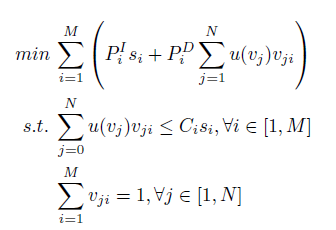

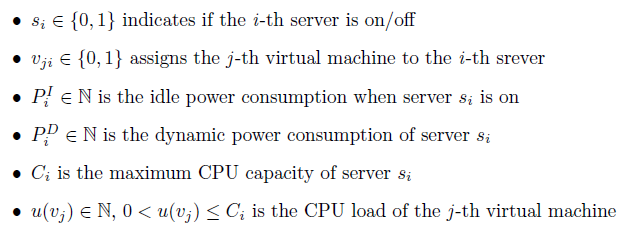

In [7]:
# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex157

Minimize
 obj: si0 + si1 + si2 + si3 + si4 + [ 2 vj0i0*uj0 + 2 vj1i0*uj1 + 2 vj2i0*uj2
      + 2 vj3i0*uj3 + 2 vj4i0*uj4 + 2 vj0i1*uj0 + 2 vj1i1*uj1 + 2 vj2i1*uj2
      + 2 vj3i1*uj3 + 2 vj4i1*uj4 + 2 vj0i2*uj0 + 2 vj1i2*uj1 + 2 vj2i2*uj2
      + 2 vj3i2*uj3 + 2 vj4i2*uj4 + 2 vj0i3*uj0 + 2 vj1i3*uj1 + 2 vj2i3*uj2
      + 2 vj3i3*uj3 + 2 vj4i3*uj4 + 2 vj0i4*uj0 + 2 vj1i4*uj1 + 2 vj2i4*uj2
      + 2 vj3i4*uj3 + 2 vj4i4*uj4 ]/2
Subject To
 cons2: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 >= 50
 cons3: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 >= 50
 cons4: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 >= 50
 cons5: vj0i3 + vj1i3 + vj2i3 + vj3i3 + vj4i3 >= 50
 cons5a: vj0i4 + vj1i4 + vj2i4 + vj3i4 + vj4i4 >= 50
 cons14: si0 >= 1
 cons15: si1 >= 1
 cons16: si2 >= 1
 cons17: si3 >= 1
 cons17a: si4 >= 1
 cons22: uj0 >= 1
 cons23: uj1 >= 1
 cons24: uj2 >= 1
 cons25: uj3 >= 1
 cons25a: uj4 >= 1
 cons26: vj0i0 + vj0i1 + vj0i2 

##Classical solution

In [8]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [9]:
# define QUBO optimizer
#qubo_optimizer = exact
qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
#convex_optimizer = cobyla
convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(params=admm_params,
                     qubo_optimizer=qubo_optimizer,
                     continuous_optimizer=convex_optimizer,
                    )

In [10]:

# run ADMM to solve problem
import time
t1 = time.perf_counter()

result = admm.solve(qp)

t2 = time.perf_counter()
print('time taken to run:',round(t2-t1),' seconds')
#%tb
#%timeit

Error: Model has non-convex objective: 500.500 si0^2 + 500.500 si1^2 + 500.500 si2^2 + 


/usr/local/lib/python3.10/dist-packages/qiskit_optimization/algorithms/cplex_optimizer.py:128: UserWarning: CPLEX cannot solve the model
  warn("CPLEX cannot solve the model")


time taken to run: 0  seconds


In [11]:
print(result.prettyprint())

objective function value: 0.0
variable values: si0=0.0, si1=0.0, si2=0.0, si3=0.0, si4=0.0, vj0i0=0.0, vj1i0=0.0, vj2i0=0.0, vj3i0=0.0, vj4i0=0.0, vj0i1=0.0, vj1i1=0.0, vj2i1=0.0, vj3i1=0.0, vj4i1=0.0, vj0i2=0.0, vj1i2=0.0, vj2i2=0.0, vj3i2=0.0, vj4i2=0.0, vj0i3=0.0, vj1i3=0.0, vj2i3=0.0, vj3i3=0.0, vj4i3=0.0, vj0i4=0.0, vj1i4=0.0, vj2i4=0.0, vj3i4=0.0, vj4i4=0.0, uj0=0.0, uj1=0.0, uj2=0.0, uj3=0.0, uj4=0.0
status: INFEASIBLE


* objective function value: 255.0
* si0=1.0, si1=1.0, si2=1.0, si3=1.0, si4=1.0
* vj0i0=9.98, vj1i0=9.98, vj2i0=10.02, vj3i0=10.02, vj4i0=10.01
* vj0i1=10.17, vj1i1=10.08, vj2i1=10.09, vj3i1=9.98, vj4i1=9.68
* vj0i2=9.63, vj1i2=10.34, vj2i2=9.98, vj3i2=9.98, vj4i2=10.08
* vj0i3=9.90, vj1i3=10.05, vj2i3=10.00, vj3i3=10.00, vj4i3=10.04
* vj0i4=10.16, vj1i4=9.87, vj2i4=9.55, vj3i4=10.26, vj4i4=10.16
* uj0=1.0, uj1=1.0, uj2=1.0, uj3=1.0, uj4=1.0
* status: INFEASIBLE


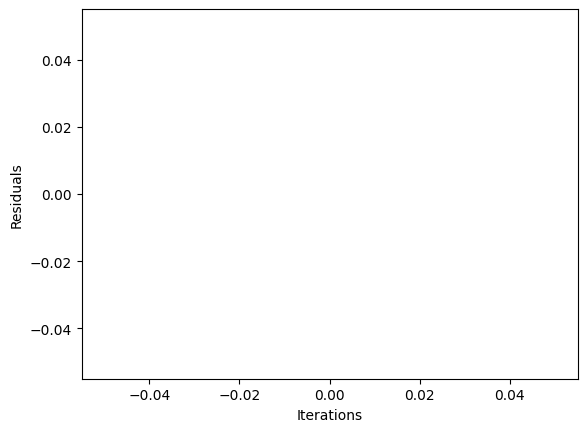

In [12]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [13]:
print(result)
print(result.state)
print(admm.get_compatibility_msg(qp))
admm.get_compatibility_msg(qp)

fval=0.0, si0=0.0, si1=0.0, si2=0.0, si3=0.0, si4=0.0, vj0i0=0.0, vj1i0=0.0, vj2i0=0.0, vj3i0=0.0, vj4i0=0.0, vj0i1=0.0, vj1i1=0.0, vj2i1=0.0, vj3i1=0.0, vj4i1=0.0, vj0i2=0.0, vj1i2=0.0, vj2i2=0.0, vj3i2=0.0, vj4i2=0.0, vj0i3=0.0, vj1i3=0.0, vj2i3=0.0, vj3i3=0.0, vj4i3=0.0, vj0i4=0.0, vj1i4=0.0, vj2i4=0.0, vj3i4=0.0, vj4i4=0.0, uj0=0.0, uj1=0.0, uj2=0.0, uj3=0.0, uj4=0.0, status=INFEASIBLE



''

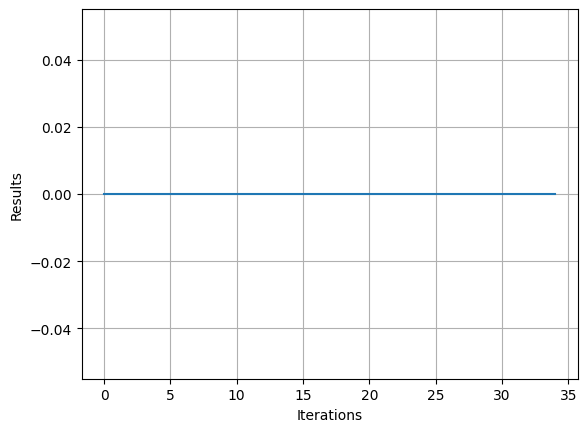

In [14]:
plt.plot(result.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.grid()
plt.show()

<qiskit_optimization.algorithms.admm_optimizer.ADMMState at 0x7f139d9c9a10>

##Quantum solution

In [15]:
# define QUBO optimizer
qubo_optimizer = qaoa

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with quantum QUBO optimizer and classical convex optimizer
admm_q = ADMMOptimizer(
    params=admm_params, qubo_optimizer=qubo_optimizer, continuous_optimizer=convex_optimizer
)

In [16]:
# run ADMM to solve problem
import time
t1 = time.perf_counter()

result_q = admm_q.solve(qp)

t2 = time.perf_counter()
print('time taken to run:',round(t2-t1),' seconds')
#%tb
#%timeit

AttributeError: 'SparsePauliOp' object has no attribute 'primitive_strings'

In [ ]:
print(result_q.prettyprint())

* objective function value: 255.0
* si0=1.0, si1=1.0, si2=1.0, si3=1.0, si4=1.0
* vj0i0=9.98, vj1i0=9.98, vj2i0=10.02, vj3i0=10.02, vj4i0=10.01
* vj0i1=10.17, vj1i1=10.08, vj2i1=10.08, vj3i1=9.98, vj4i1=9.68
* vj0i2=9.63, vj1i2=10.34, vj2i2=9.98, vj3i2=9.98, vj4i2=10.08
* vj0i3=9.90, vj1i3=10.05, vj2i3=10.00, vj3i3=10.00, vj4i3=10.04
* vj0i4=10.16, vj1i4=9.87, vj2i4=9.55, vj3i4=10.26, vj4i4=10.16
* uj0=1.0, uj1=1.0, uj2=1.0, uj3=1.0, uj4=1.0
* status: INFEASIBLE

In [ ]:
plt.clf()
plt.plot(result_q.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [ ]:
plt.plot(result_q.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.grid()
plt.show()

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright